importing the libraries

In [432]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV




import os
import warnings
warnings.filterwarnings('ignore')

Data collection and analysis and defenation dataset

In [433]:
# diabets dataset
diabets_dataset = pd.read_csv('diabetes.csv.csv')

In [434]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool' = False, date_parser=<no_default>, date_format: 'str | None' = None, dayfirst: '

In [435]:
# printing the first 5 row of the dataset of diabets
diabets_dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [436]:
#### getting 5 row of the last dataset

diabets_dataset.tail(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [437]:
# getting sample 

diabets_dataset.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
508,2,84,50,23,76,30.4,0.968,21,0
317,3,182,74,0,0,30.5,0.345,29,1


In [438]:
# numbers of rows and column in this dataset (types pf title column)
diabets_dataset.shape

(768, 9)

In [439]:
# statical measures of the data in dataset  all of information about dataset
diabets_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [440]:
# descriptive statstic of dataset 
diabets_dataset.describe([1]).T

,count,mean,std,min,50%,100%,max
Pregnancies,768.0,3.845052,3.369578,0.000,3.0000,17.00,17.00
Glucose,768.0,120.894531,31.972618,0.000,117.0000,199.00,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,72.0000,122.00,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,23.0000,99.00,99.00
Insulin,768.0,79.799479,115.244002,0.000,30.5000,846.00,846.00
BMI,768.0,31.992578,7.884160,0.000,32.0000,67.10,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.3725,2.42,2.42
Age,768.0,33.240885,11.760232,21.000,29.0000,81.00,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.0000,1.00,1.00


Data Preparation

Adding null value to the dataset

Checking null value

In [441]:
##### checking null value
diabets_dataset.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [442]:
diabets_dataset[diabets_dataset.isnull().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [443]:
#### There are no Null value
diabets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data Visualization for showing null value

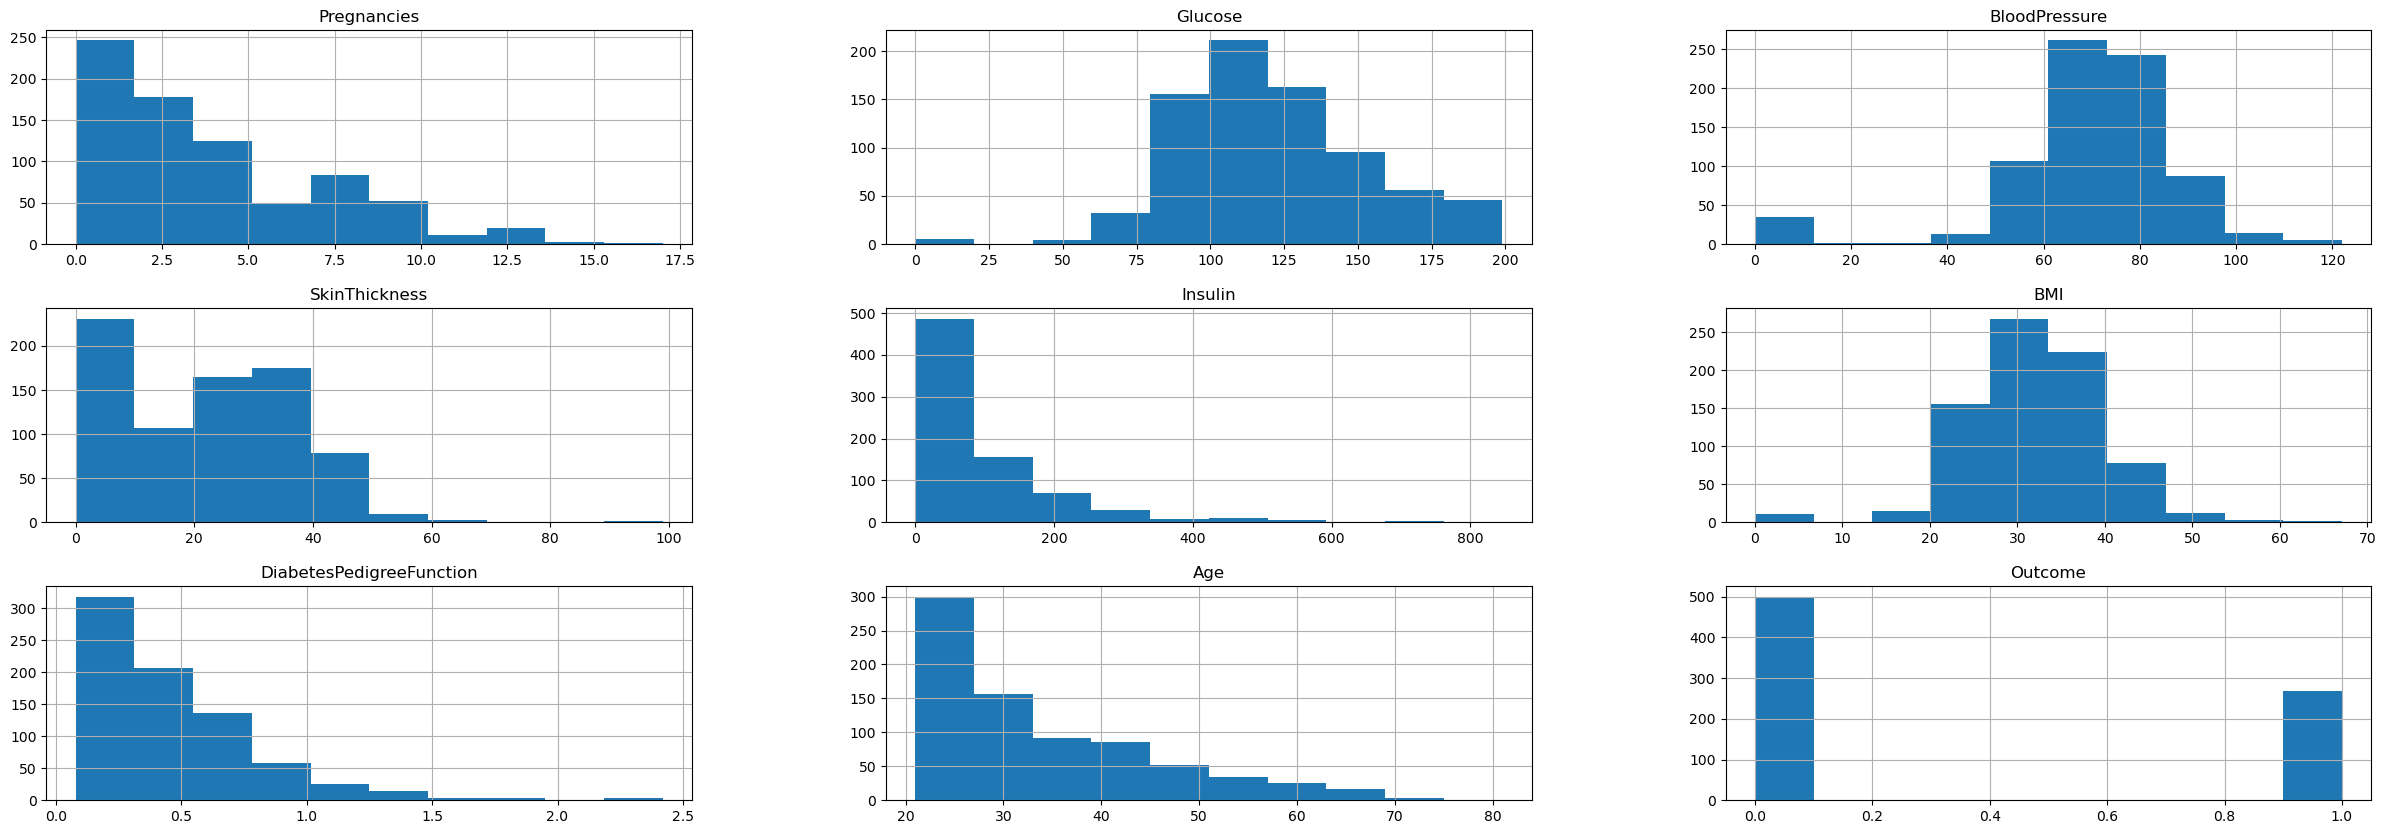

In [444]:
p = diabets_dataset.hist(figsize = (30,10))

In [445]:
diabets_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Filling null value for dataset

In [446]:
#### filling null value by the best method

diabets_dataset.fillna(method='bfill', limit=(2))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Cheking null value ,,   showing the number of null value 

In [447]:
###### the number of null value in dataset

print(diabets_dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [448]:
diabets_dataset.duplicated().sum()

0

Finding Outlier 

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


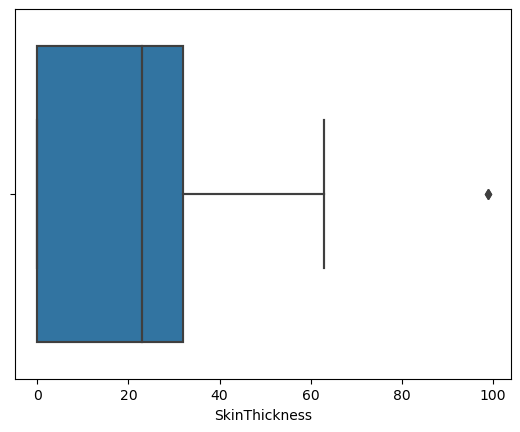

In [449]:
for feature in diabets_dataset:
    
    Q1 = diabets_dataset[feature].quantile(0.25)
    Q3 = diabets_dataset[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if diabets_dataset[(diabets_dataset[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")
        sns.boxplot(x = diabets_dataset["SkinThickness"])

<Axes: xlabel='SkinThickness'>

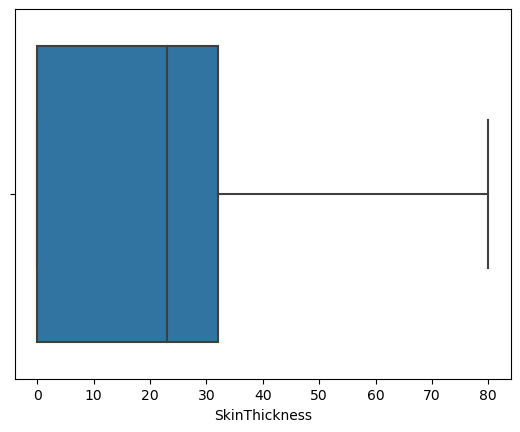

In [450]:
Q1 = diabets_dataset.SkinThickness.quantile(0.25)
Q3 = diabets_dataset.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
diabets_dataset.loc[diabets_dataset["SkinThickness"] > upper,"SkinThickness"] = upper
sns.boxplot(x = diabets_dataset["SkinThickness"])

In [451]:


lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabets_dataset)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Data Visualization


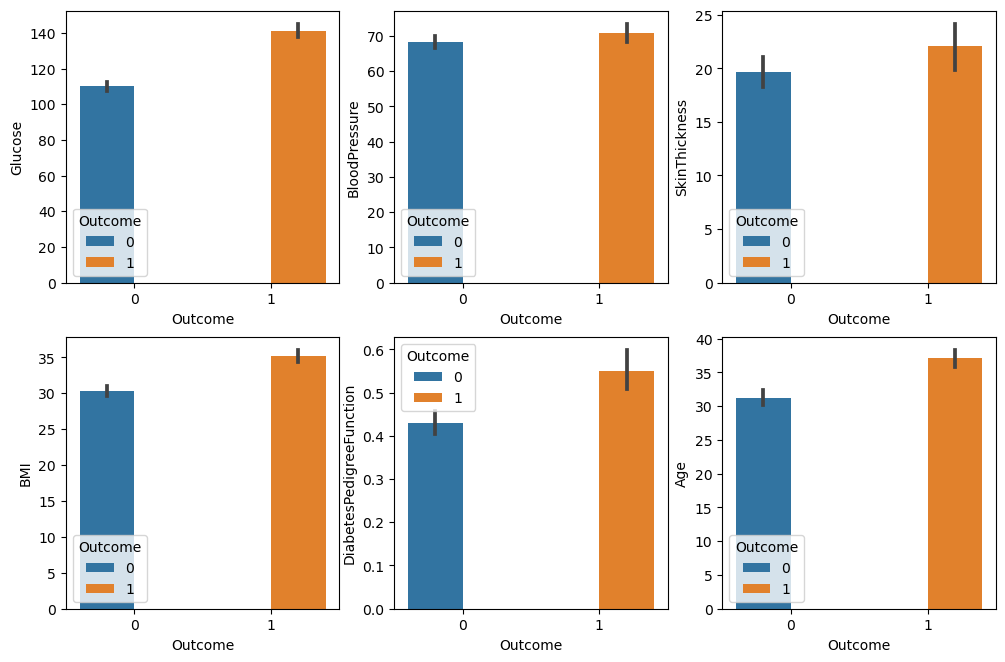

In [452]:
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Outcome',y='Glucose',data=diabets_dataset,hue="Outcome")
plt.subplot(3,3,2)
sns.barplot(x='Outcome',y='BloodPressure',data=diabets_dataset,hue="Outcome")
plt.subplot(3,3,3)
sns.barplot(x='Outcome',y='SkinThickness',data=diabets_dataset,hue="Outcome")
plt.subplot(3,3,4)
sns.barplot(x='Outcome',y='BMI',data=diabets_dataset,hue="Outcome")
plt.subplot(3,3,5)
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabets_dataset,hue="Outcome")
plt.subplot(3,3,6)
sns.barplot(x='Outcome',y='Age',data=diabets_dataset,hue="Outcome")
plt.show()

 this one show BMI and insulin. It shows insulin counts above 200 resulted in more cases of diabetes.

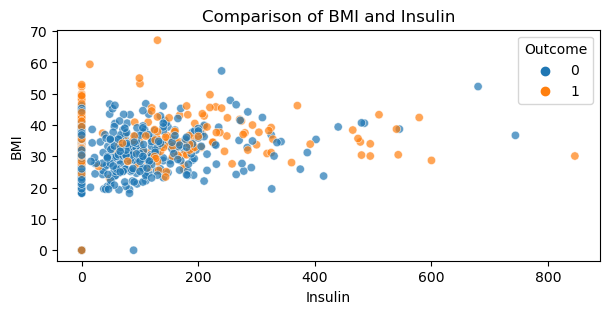

In [453]:
plt.figure(figsize=(7,3))
sns.scatterplot(x='Insulin', y='BMI', data=diabets_dataset, hue='Outcome', alpha= 0.7)
plt.title('Comparison of BMI and Insulin')
plt.show()

Data Exploration = Data Analyze 

In [454]:
 ###########   find correlation between variable in dataset
diabets_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081370,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.053995,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.208705,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081370,0.053995,0.208705,1.000000,0.440828,0.394699,0.184689,-0.118567,0.073125
Insulin,-0.073535,0.331357,0.088933,0.440828,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.394699,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.184689,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.118567,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.073125,0.130548,0.292695,0.173844,0.238356,1.000000


In [455]:
diabets_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 = those person that have not diabets
1 = those person have diabets

In [456]:
diabets_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.093284,100.335821,35.142537,0.550500,37.067164


In [457]:
# separating data and labels 
x = diabets_dataset.drop(columns='Outcome' , axis=1)
y = diabets_dataset['Outcome']

In [495]:
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [496]:
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data standardization , start machine learing for beeter pridction 
Standardizing the “X” values due to the high variation in range of numbers present in the different columns.

In [460]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [461]:
x = standardized_data
y = diabets_dataset['Outcome']


print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data modeling of dataset

In [462]:
print(x.shape, y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)
print(x.shape, X_train.shape, X_test.shape)

(768, 8) (768,)
(768, 8) (614, 8) (154, 8)


training the model (Building the SVM Model)

In [463]:
### Support Vector Machine (SVM)
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, Y_train)


SVC()

Prediction from support vector machine model on the testing data

In [464]:
svc_pred = svc_model.predict(X_test)

Accuracy score for SVM

In [465]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(Y_test, svc_pred)))

Accuracy Score = 0.7272727272727273


Classification report of SVMSVC

In [466]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))

[[88 12]
 [30 24]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.67      0.44      0.53        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154



IF we are using another model Building the model using RandomForest

In [467]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [468]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(Y_train, rfc_train)))

Accuracy_Score = 1.0


In [469]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [470]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [471]:


# Train the support vector Machine Classifier
model.fit(X_train, Y_train)

RandomForestClassifier()

After building the model, the model has to predict output with test data. After the prediction of the outcome with test data, we can calculate the accuracy score of the prediction results by the model.

In [472]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)

In [473]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [10, 50, 100]})

Output:

The person is diabetic

In [474]:
rfc.feature_importances_

array([0.08913557, 0.26193834, 0.08576409, 0.07464887, 0.07235418,
       0.16903457, 0.12227946, 0.12484492])

//// saving model 

In [475]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [476]:
diabets_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [477]:
diabets_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Putting data points in the model will either return 0 or 1 i.e. person suffering from diabetes or not

In [501]:
rfc.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)